# Chapitre 2

## Introduction

\draw[fill] (0.357143, 0.812214) circle (0.10);
\draw[fill] (0.948918, 1.143265) circle (0.10);
\draw[fill] (1.187496, 1.678099) circle (0.10);
\draw[fill] (1.777419, 1.333357) circle (0.10);
\draw[fill] (2.258380, 2.091978) circle (0.10);
\draw[fill] (3.509795, 2.169851) circle (0.10);
\draw[fill] (4.554073, 2.923194) circle (0.10);
\draw[domain=0:5.000000, smooth, variable=\x, red] 
     plot ({\x}, {0.788978 + \x * 0.454260});


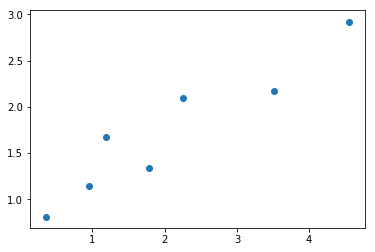

In [37]:
import numpy as np
import pylab as pl
from sklearn.linear_model import LinearRegression

f = lambda x: 0.4 + 3/5 * x
N = 7
xs = [5/7/2]
for i in range(N-1):
    xs.append(xs[i] + np.random.rand(1)[0] * 2 * 5 / 7)
ys = f(np.array(xs)) + np.random.rand(N)*1.2 - 0.6
for i in range(N):
    line = "\draw[fill] (%f, %f) circle (0.10);"
    print(line % (xs[i], ys[i]))

xp = [[a] for a in xs]
reg = LinearRegression().fit(xp, ys)
line = "\draw[domain=0:%f, smooth, variable=\\x, red] \n \
    plot ({\\x}, {%f + \\x * %f});"
print(line % (max(5, xs[-1]+0.2), reg.predict([[0]]), reg.coef_))

pl.scatter(xs, ys)
pl.show()

## Coefficient d'apprentissage

\draw[domain=1.181978:6.956124, smooth, variable=\x, blue] 
     plot ({\x}, {0.5 * (\x - 4)^2});
\draw[->, greenTikz] (2.000000, 2.000000) -- (3.500000, 0.125000);
\draw[->, red] (2.000000, 2.000000) -- (6.160000, 2.332800);
\draw[->, greenTikz] (3.500000, 0.125000) -- (3.875000, 0.007812);
\draw[->, red] (6.160000, 2.332800) -- (1.667200, 2.720978);
\draw[->, greenTikz] (3.875000, 0.007812) -- (3.968750, 0.000488);
\draw[->, red] (1.667200, 2.720978) -- (6.519424, 3.173749);


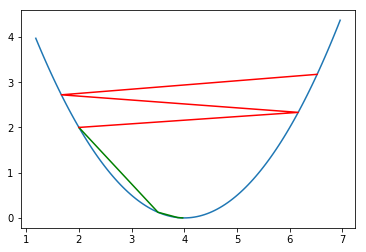

In [52]:
f = lambda x: 0.5*(x - 4)**2
fp = lambda x: (x - 4)

def descente(a, x0, n):
    res = [x0]
    for _ in range(n):
        res.append(res[-1] - a*fp(res[-1]))
    return res

N = 3
d1 = descente(0.75, 2, N)
d2 = descente(2.08, 2, N)
miX, maX = min(d1 + d2), max(d1 + d2)
xs = [miX + (maX - miX) * (i-10) / 100 for i in range(120)]
ys = f(np.array(xs))
y1s = f(np.array(d1))
y2s = f(np.array(d2))
line = "\draw[domain=%f:%f, smooth, variable=\\x, blue] \n \
    plot ({\\x}, {0.5 * (\\x - 4)^2});"
print(line % (xs[0], xs[-1]))
line = "\draw[->, %s] (%f, %f) -- (%f, %f);"
for i in range(N):
    print(line % ("greenTikz", d1[i], y1s[i], d1[i+1], y1s[i+1]))
    print(line % ("red", d2[i], y2s[i], d2[i+1], y2s[i+1]))

pl.plot(xs, ys)
pl.plot(d1, y1s, "g")
pl.plot(d2, y2s, "r")
pl.show()

## Régularisation

(0.342898, 0.939373)
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 0.758839 * cos(\t) + 0.110799 * sin(\t)}, {1.700000 + -0.276998 * cos(\t) + 0.303536 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 1.517678 * cos(\t) + 0.221598 * sin(\t)}, {1.700000 + -0.553996 * cos(\t) + 0.607071 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 2.276518 * cos(\t) + 0.332398 * sin(\t)}, {1.700000 + -0.830994 * cos(\t) + 0.910607 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 3.035357 * cos(\t) + 0.443197 * sin(\t)}, {1.700000 + -1.107992 * cos(\t) + 1.214143 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({10.800000 + 0.822338 * cos(\t) + 0.120071 * sin(\t)}, {1.700000 + -0.300177 * cos(\t) + 0.328935 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({10.800000 + 1.644677 * cos(\t) + 0.24

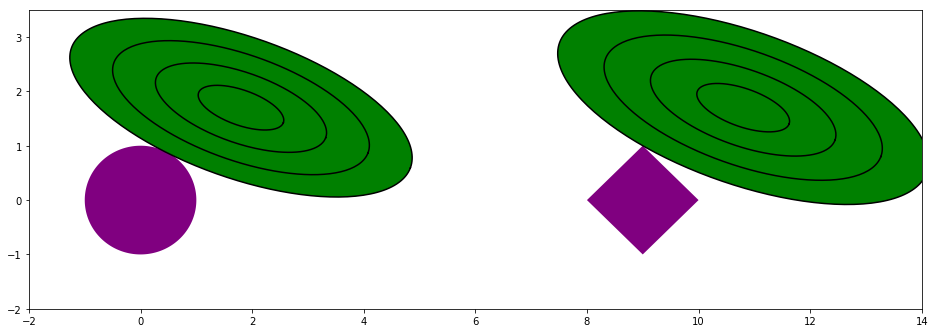

In [91]:
import numpy as np
import pylab as pl

theta = -0.35
scale = 0.4
c, s = np.cos(theta), np.sin(theta)
M = np.matrix([[c, -scale*s], [s, scale*c]])
x0, y0 = 1.8, 1.7
print("(%f, %f)" % (-s, c))
v = np.matrix([x0 + s, y0 - c]).T
vi = M.I @ v
d = (vi.T @ vi).A[0] ** 0.5
v = np.matrix([x0, y0-1]).T
vi = M.I @ v
d2 = (vi.T @ vi).A[0] ** 0.5

fig = pl.figure(figsize=(16, 5.5))
pl.xlim(-2, 14)
pl.ylim(-2, 3.5)
N = 100
a = np.array([np.pi * i / N for i in range(2*N+1)])
p = M @ np.array([np.cos(a), np.sin(a)])
curve = "\draw[domain=0:360, smooth, variable=\\t, very thick] \n \
    plot ({%f + %f * cos(\\t) + %f * sin(\\t)}, {%f + %f * cos(\\t) + %f * sin(\\t)});"
for sc in [d*(i+1)/4 for i in range(4)]:
    x = x0 + sc * p.A[0]
    y = y0 + sc * p.A[1]
    pl.plot(x, y, "black")
    print(curve % (x0, sc*M[0, 0], sc*M[0, 1], y0, sc*M[1, 0], sc*M[1, 1]))
pl.fill(x, y, "g")
for sc in [d2*(i+1)/4 for i in range(4)]:
    x = x0 + 9 + sc * p.A[0]
    y = y0 + sc * p.A[1]
    pl.plot(x, y, "black")
    print(curve % (x0 + 9, sc*M[0, 0], sc*M[0, 1], y0, sc*M[1, 0], sc*M[1, 1]))
pl.fill(x, y, "g")
pl.fill(np.cos(a), np.sin(a), "purple")
pl.fill([9, 8, 9, 10], [1, 0, -1, 0], "purple")
pl.show()

## Régression logistique

0.10679611650485427 [0.63106796]
30.138125854587635 -16.54720661231526


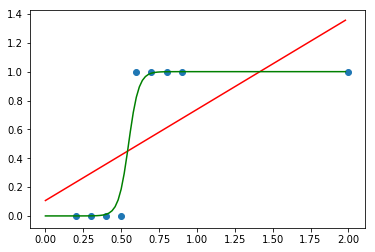

In [56]:
import numpy as np
import pylab as pl
from sklearn.linear_model import LinearRegression

x = np.array([0.2+0.1*i for i in range(8)] + [2])
y = [0]*4 + [1]*5
pl.scatter(x, y)
xs = np.array([0.02*i for i in range(100)])

reg = LinearRegression().fit(x.reshape(-1, 1), y)
l = reg.predict(xs.reshape(-1, 1))
pl.plot(xs, l, "r")
print(l[0], reg.coef_)

al = 0.02
a, b = 30, -16
def sig(x):
    return 1/(1+np.exp(-x))
for _ in range(1000):
    adda, addb = 0, 0
    for i in range(len(x)):
        diff = y[i] - sig(a*x[i]+b)
        adda += diff*x[i]
        addb += diff
    a += adda*al
    b += addb*al
print(a, b)
pl.plot(xs, [sig(a*w+b) for w in list(xs)], "g")

pl.show()

3.125167413324238 2.5371329852563402


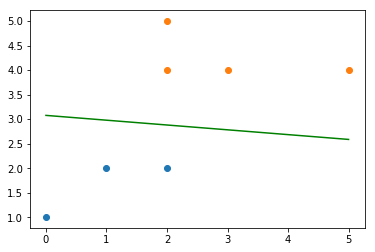

In [10]:
import pylab as pl

x = [0, 1, 2, 5, 3, 2, 2]
x2 = [1, 2, 2, 4, 4, 5, 4]
y = [0, 0, 0, 1, 1, 1, 1]
pl.scatter(x[:3], x2[:3])
pl.scatter(x[3:], x2[3:])

al = 0.02
a, b, c = 0.3, 3, -10
def sig(x):
    return 1/(1+np.exp(-x))
for _ in range(1000):
    adda, addb, addc = 0, 0, 0
    for i in range(len(x)):
        diff = y[i] - sig(a*x[i]+b*x2[i]+c)
        adda += diff*x[i]
        addb += diff*x2[i]
        addc += diff
    a += adda*al
    b += addb*al
    c += addc*al
def sep(x):
    return - (a*x + c) / b
pl.plot([0, 5], [sep(0), sep(5)], "g")
print(sep(-0.5), sep(5.5))

pl.show()

## Méthode de Newton

         4        3         2
-0.8577 x + 4.53 x - 7.303 x + 4.716 x - 0.686
\draw[fill, greenTikz] (1.800000, 0.000000) {$\bullet$};
\draw[fill, greenTikz] (1.800000, 1.559280) {$\bullet$};
\draw[fill, greenTikz] (1.164304, 0.000000) {$\bullet$};
\draw[fill, greenTikz] (1.164304, 0.479580) {$\bullet$};
\draw[fill, greenTikz] (0.498177, 0.000000) {$\bullet$};
\draw[fill, greenTikz] (0.498177, 0.358360) {$\bullet$};


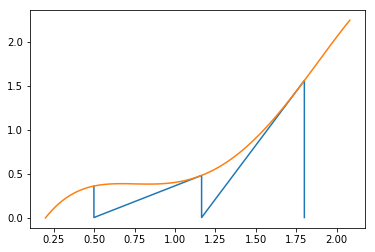

In [45]:
import numpy as np
import pylab as pl
from scipy.interpolate import lagrange

x = [0.2, 0.4, 1, 1.6, 2.7]
y = [0, 0.3, 0.4, 1.1, 2.4]
#pl.scatter(x, y, color='g')
P = lagrange(x, y)
dP = P.deriv(1)
print(P)

a = [1.8] * 2
b = [0, P(a[0])]
for _ in range(2):
    a += [a[-1] - P(a[-1]) / dP(a[-1])] * 2
    b += [0, P(a[-1])]
line = "\draw[greenTikz] (%f, %f) node {$\\bullet$};"
for i in range(len(a)):
    print(line % (a[i], b[i]))
pl.plot(a, b)

e, d = min(a)-0.3, max(a) - min(a) + 0.6
xs = np.array([e + d/100*i for i in range(100)])
pl.plot(xs, P(xs))

pl.show()

# Chapitre 3

## KNN

\draw[blue] (0.626252, 0.819381) node {$\bullet$};
\draw[red] (0.500000, 0.500000) circle (0.343429);
\draw[blue] (2.626252, 0.819381) node {$\bullet$};
\draw[blue] (2.766462, 0.208311) node {$\bullet$};
\draw[blue] (2.265342, 0.502120) node {$\bullet$};
\draw[blue] (2.555533, 0.427031) node {$\bullet$};
\draw[blue] (2.403969, 0.184887) node {$\bullet$};
\draw[blue] (2.720170, 0.620170) node {$\bullet$};
\draw[blue] (2.899990, 0.885093) node {$\bullet$};
\draw[blue] (2.759190, 0.760827) node {$\bullet$};
\draw[blue] (2.378418, 0.014533) node {$\bullet$};
\draw[blue] (2.471300, 0.483678) node {$\bullet$};
\draw[blue] (2.245568, 0.344532) node {$\bullet$};
\draw[blue] (2.455625, 0.462233) node {$\bullet$};
\draw[blue] (2.229553, 0.741057) node {$\bullet$};
\draw[blue] (2.905409, 0.670901) node {$\bullet$};
\draw[blue] (2.151966, 0.686839) node {$\bullet$};
\draw[blue] (2.407978, 0.621513) node {$\bullet$};
\draw[red] (2.500000, 0.500000) circle (0.152425);
\draw[blue] (4.626252, 0.819381

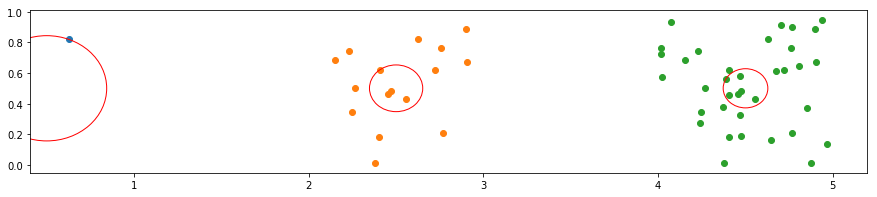

In [28]:
import numpy as np
import pylab as pl

pl.figure(figsize=(15, 3))

l = [1, 4, 6]
ps = np.random.rand(l[-1]**2, 2)
for i in range(3):
    n = l[i]
    a = ps[:n**2]
    a = [[x[0]+i*2, x[1]] for x in a]
    for x in a:
        print("\draw[blue] (%f, %f) node {$\\bullet$};" % (x[0], x[1]))
    c = [i*2+0.5, 0.5]
    r = sorted([(x[0]-c[0])**2 + (x[1]-c[1])**2 for x in a])[n-1] ** 0.5
    print("\draw[red] (%f, %f) circle (%f);" % (c[0], c[1], r))
    cir = pl.Circle(c, r, color='r', fill=False)
    pl.gcf().gca().add_artist(cir)
    pl.scatter([x[0] for x in a], [x[1] for x in a])

pl.show()

## Loi normale

\draw[blue] (11.000000, 0.006779) -- (11.100000, 0.007873) -- (11.200000, 0.009383) -- (11.300000, 0.011256) -- (11.400000, 0.013063) -- (11.500000, 0.016750) -- (11.600000, 0.021479) -- (11.700000, 0.025188) -- (11.800000, 0.029294) -- (11.900000, 0.037798) -- (12.000000, 0.048504) -- (12.100000, 0.070106) -- (12.200000, 0.086664) -- (12.300000, 0.091432) -- (12.400000, 0.105619) -- (12.500000, 0.131789) -- (12.600000, 0.167379) -- (12.700000, 0.199576) -- (12.800000, 0.179463) -- (12.900000, 0.215490) -- (13.000000, 0.235025) -- (13.100000, 0.261005) -- (13.200000, 0.258727) -- (13.300000, 0.331118) -- (13.400000, 0.342982) -- (13.500000, 0.399206) -- (13.600000, 0.327205) -- (13.700000, 0.435013) -- (13.800000, 0.328604) -- (13.900000, 0.399489) -- (14.000000, 0.392978) -- (14.100000, 0.391679) -- (14.200000, 0.412969) -- (14.300000, 0.361395) -- (14.400000, 0.391842) -- (14.500000, 0.364244) -- (14.600000, 0.314217) -- (14.700000, 0.335372) -- (14.800000, 0.258383) -- (14.900000, 0

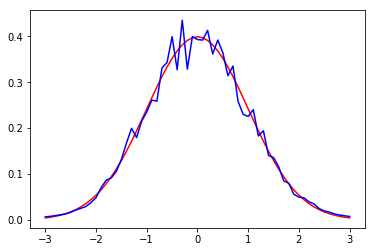

In [42]:
import numpy as np
import pylab as pl

mulnor = 1 / np.sqrt(2*np.pi)
def nor(x):
    return mulnor * np.exp(-0.5 * x**2)

N = 60
xs = np.array([i/60 for i in range(N+1)]) * 6 - 3
y0 = nor(xs)
m = 10000
k = int(m**0.5)
s = np.random.normal(0, 1, m)
def nor2(x):
    return 1 / sorted(abs(s - x))[k-1]
y = [nor2(x) for x in xs]
mul = sum(y0) / sum(y)
y = [mul*v for v in y]
line = "\draw[blue]"
for i in range(N+1):
    line += " (%f, %f) --" % (14+xs[i], y[i])
print(line)

pl.plot(xs, y0, "r")
pl.plot(xs, y, "b")
pl.show()

## Facteur k

\draw[] (0.000000, 0.000000) -- (0.016667, 0.032778) -- (0.033333, 0.064444) -- (0.050000, 0.095000) -- (0.066667, 0.124444) -- (0.083333, 0.152778) -- (0.100000, 0.180000) -- (0.116667, 0.206111) -- (0.133333, 0.231111) -- (0.150000, 0.255000) -- (0.166667, 0.277778) -- (0.183333, 0.299444) -- (0.200000, 0.320000) -- (0.216667, 0.339444) -- (0.233333, 0.357778) -- (0.250000, 0.375000) -- (0.266667, 0.391111) -- (0.283333, 0.406111) -- (0.300000, 0.420000) -- (0.316667, 0.432778) -- (0.333333, 0.444444) -- (0.350000, 0.455000) -- (0.366667, 0.464444) -- (0.383333, 0.472778) -- (0.400000, 0.480000) -- (0.416667, 0.486111) -- (0.433333, 0.491111) -- (0.450000, 0.495000) -- (0.466667, 0.497778) -- (0.483333, 0.499444) -- (0.500000, 0.500000);
\draw[] (0.000000, 0.000000) -- (0.016667, 0.017463) -- (0.033333, 0.036375) -- (0.050000, 0.056525) -- (0.066667, 0.077709) -- (0.083333, 0.099730) -- (0.100000, 0.122400) -- (0.116667, 0.145537) -- (0.133333, 0.168968) -- (0.150000, 0.192525) -- (0

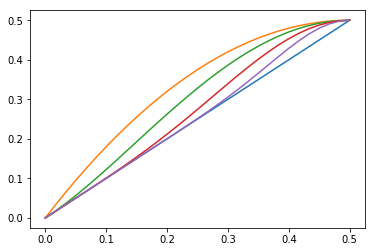

In [57]:
import numpy as np
import pylab as pl

N = 30
pl.plot([0, 0.5], [0, 0.5])
xs = [i / N / 2 for i in range(N+1)]
for k in [1, 3, 9, 27]:
    y = []
    for x0 in xs:
        e = 0
        for x in [x0, 1-x0]:
            f, invf = 1, 1
            for i in range(k // 2 + 1):
                e += x * (invf / f) * (1-x)**i * x**(k-i)
                f *= (i+1)
                invf *= (k-i)
        y.append(1-e)
    pl.plot(xs, y)
    line = "\draw[]"
    for i in range(N+1):
        line += " (%f, %f) --" % (xs[i], y[i])
    print(line[:-3] + ";")

pl.show()

7.9
